In [2]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, fetch_openml
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import cv2

Resultados para o conjunto de dados Iris:
      classifier  accuracy  f1_score  precision    recall  execution_time   
0            KNN  0.933333  0.932660   0.932660  0.932660        0.003509  \
1            SVM  0.900000  0.897698   0.902778  0.895623        0.001000   
2  Decision Tree  0.900000  0.899749   0.900000  0.902357        0.000997   
3            KNN  1.000000  1.000000   1.000000  1.000000        0.003160   
4            SVM  1.000000  1.000000   1.000000  1.000000        0.001999   
5  Decision Tree  1.000000  1.000000   1.000000  1.000000        0.001007   

   pca_applied  
0         True  
1         True  
2         True  
3        False  
4        False  
5        False  


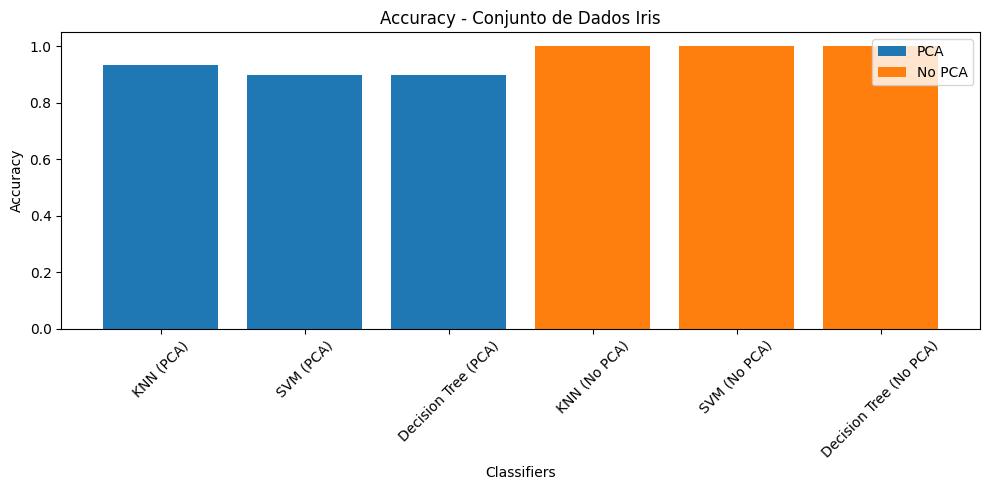

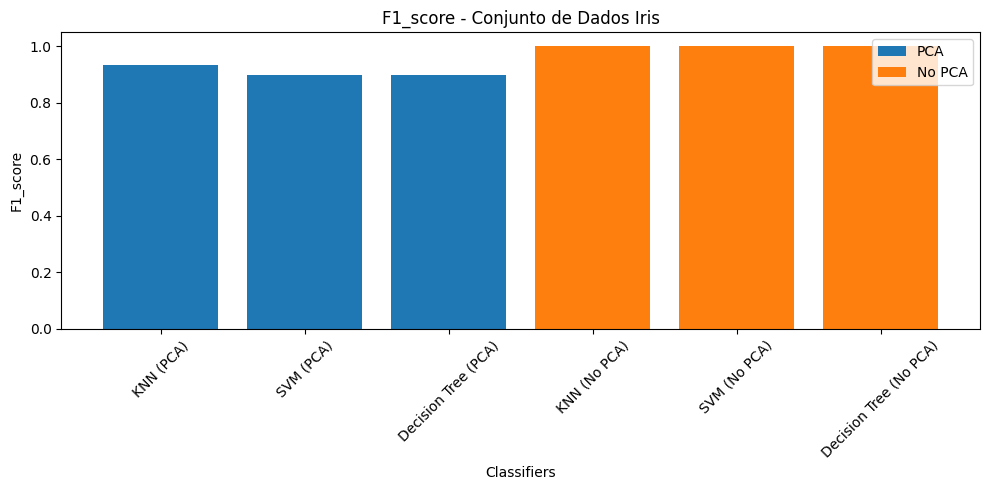

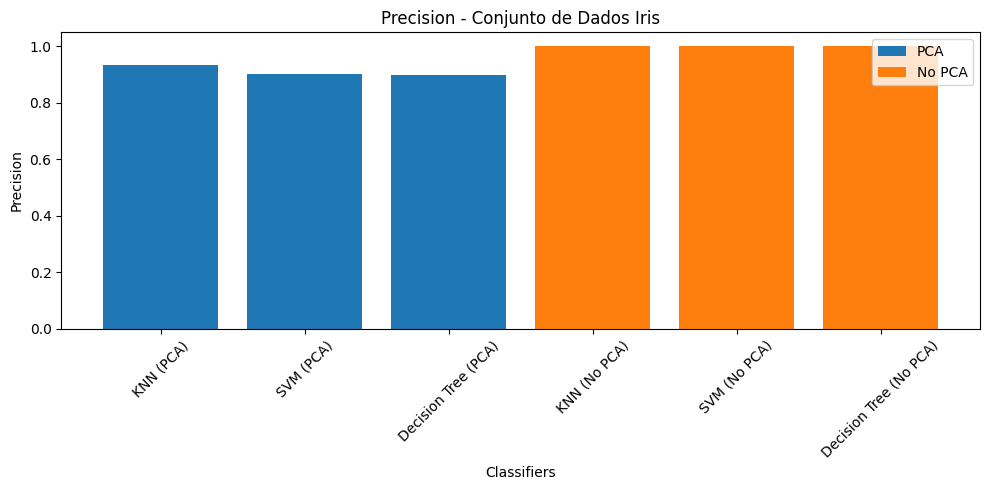

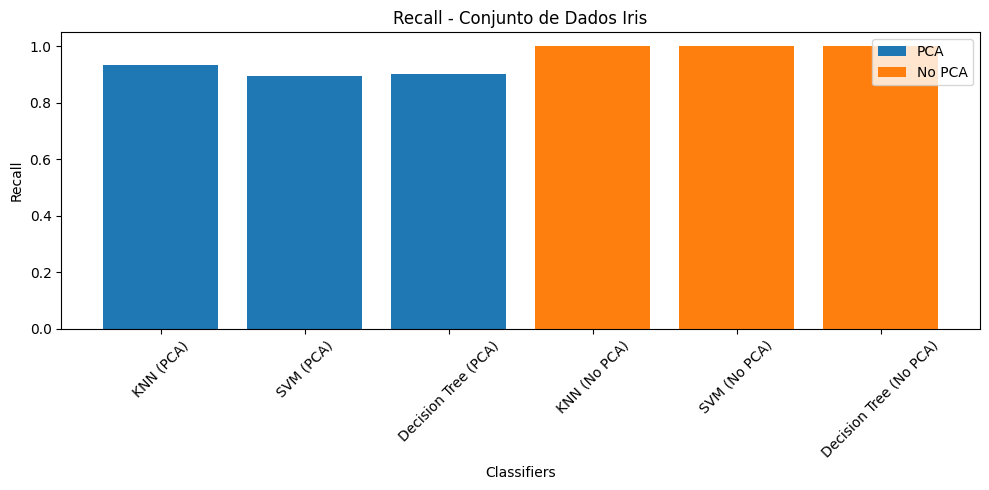

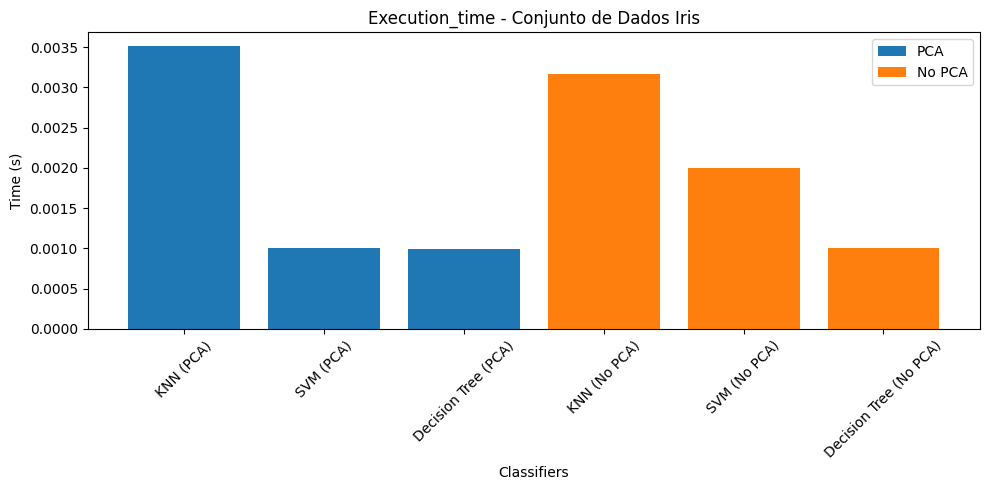


Resultados para o conjunto de dados MNIST:
      classifier  accuracy  f1_score  precision    recall  execution_time   
0            KNN  0.959357  0.959024   0.959135  0.959000        0.913737  \
1            SVM  0.970429  0.970376   0.970469  0.970315       25.481373   
2  Decision Tree  0.841429  0.839173   0.839458  0.839135        7.092721   
3            KNN  0.946143  0.945729   0.946495  0.945443        6.695299   
4            SVM  0.963143  0.963039   0.963514  0.962757      304.638034   
5  Decision Tree  0.871286  0.869291   0.869381  0.869350       14.006067   

   pca_applied  
0         True  
1         True  
2         True  
3        False  
4        False  
5        False  


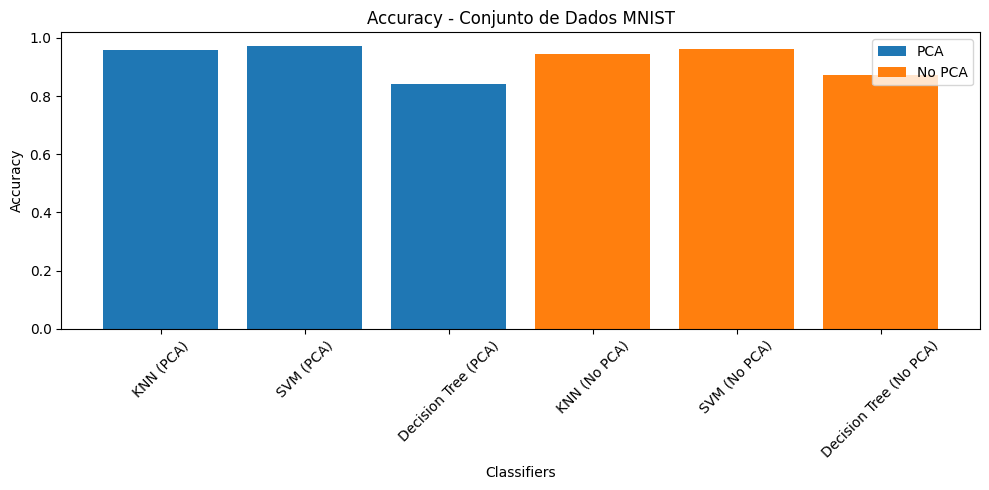

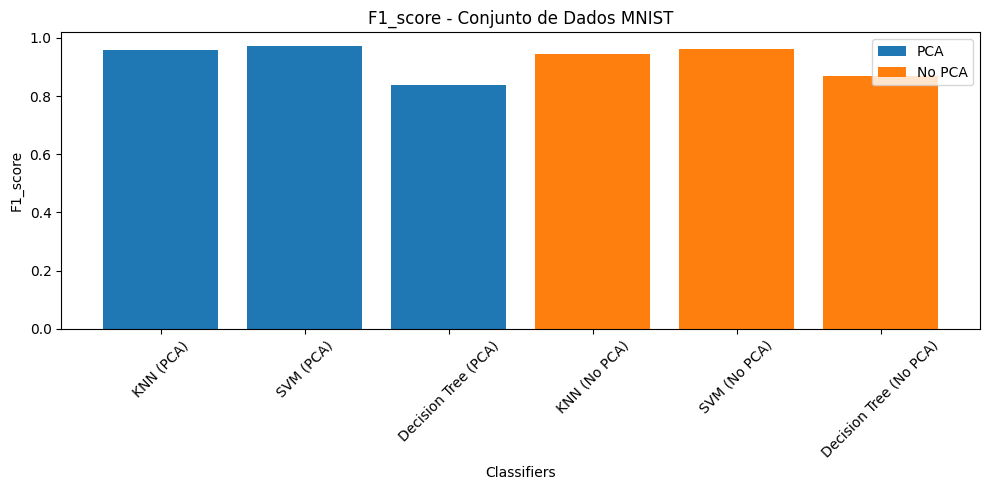

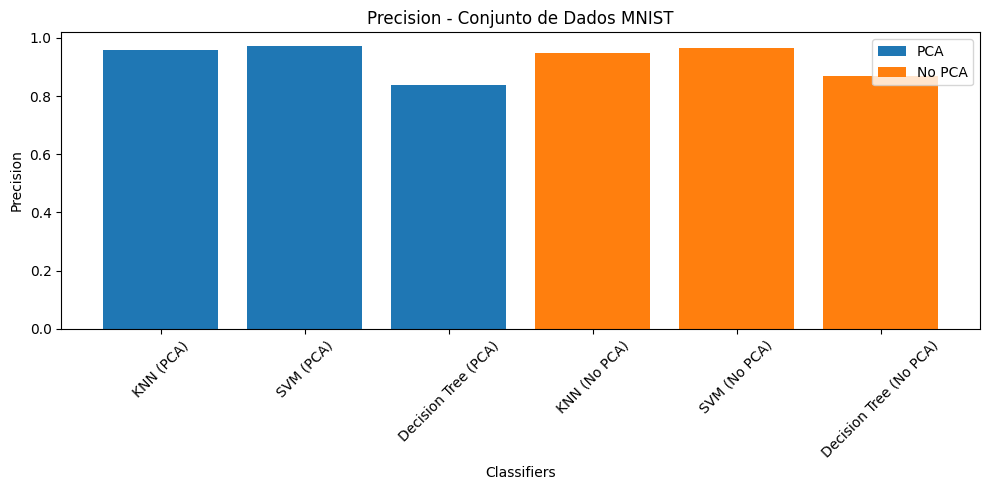

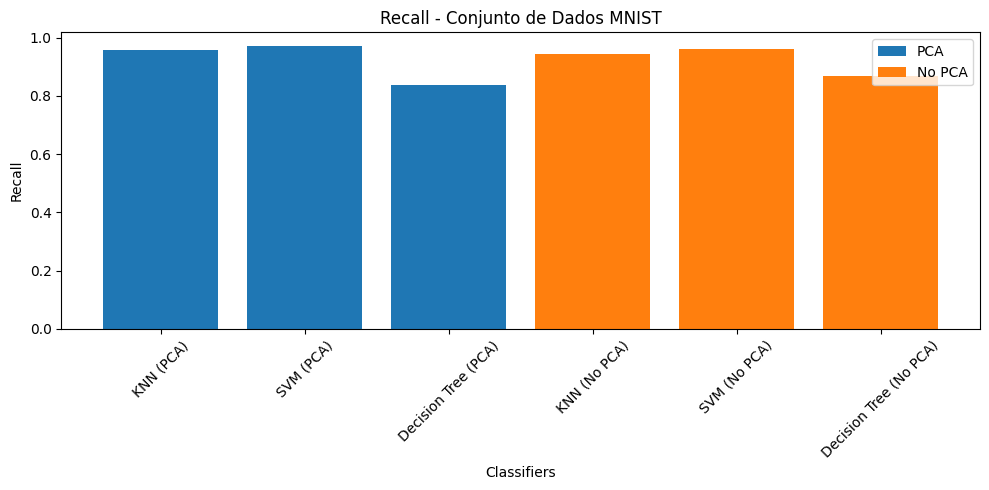

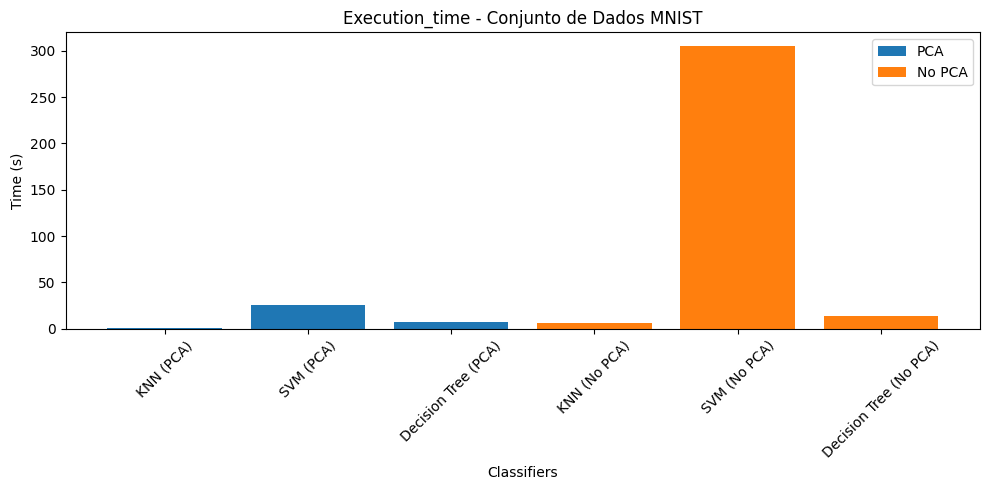

In [5]:
# Carregar o conjunto de dados Iris
iris = load_iris()
X_iris = iris.data
y_iris = iris.target

# Carregar o conjunto de dados MNIST
mnist = fetch_openml('mnist_784')
X_mnist = mnist.data
y_mnist = mnist.target.astype(int)

# Função para aplicar PCA e treinar modelos de classificação
def evaluate_classification(X, y, n_components, classifiers, apply_pca=True):
    results = []
    
    # Normalizar os dados
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    if apply_pca:
        # Aplicar PCA
        pca = PCA(n_components=n_components)
        X_transformed = pca.fit_transform(X_scaled)
    else:
        X_transformed = X_scaled
    
    # Dividir os dados em treino e teste
    X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)
    
    for name, clf in classifiers.items():
        start_time = time.time()
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        end_time = time.time()
        
        results.append({
            'classifier': name,
            'accuracy': accuracy_score(y_test, y_pred),
            'f1_score': f1_score(y_test, y_pred, average='macro'),
            'precision': precision_score(y_test, y_pred, average='macro'),
            'recall': recall_score(y_test, y_pred, average='macro'),
            'execution_time': end_time - start_time,
            'pca_applied': apply_pca
        })
    
    return results

# Definir os classificadores
classifiers = {
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier()
}

# Avaliar classificadores para o conjunto de dados Iris
iris_results_pca = evaluate_classification(X_iris, y_iris, n_components=2, classifiers=classifiers, apply_pca=True)
iris_results_no_pca = evaluate_classification(X_iris, y_iris, n_components=2, classifiers=classifiers, apply_pca=False)
iris_df = pd.DataFrame(iris_results_pca + iris_results_no_pca)

# Avaliar classificadores para o conjunto de dados MNIST
mnist_results_pca = evaluate_classification(X_mnist, y_mnist, n_components=50, classifiers=classifiers, apply_pca=True)
mnist_results_no_pca = evaluate_classification(X_mnist, y_mnist, n_components=50, classifiers=classifiers, apply_pca=False)
mnist_df = pd.DataFrame(mnist_results_pca + mnist_results_no_pca)

# Função para plotar os resultados
def plot_results(df, title):
    metrics = ['accuracy', 'f1_score', 'precision', 'recall', 'execution_time']
    n_metrics = len(metrics)
    classifiers = df['classifier'].unique()
    pca_applied = df['pca_applied'].unique()
    
    for metric in metrics:
        fig, ax = plt.subplots(figsize=(10, 5))
        for apply_pca in pca_applied:
            subset = df[df['pca_applied'] == apply_pca]
            label = 'PCA' if apply_pca else 'No PCA'
            ax.bar(subset['classifier'] + (' (PCA)' if apply_pca else ' (No PCA)'), subset[metric], label=label)
        
        ax.set_title(f'{metric.capitalize()} - {title}')
        ax.set_xlabel('Classifiers')
        ax.set_ylabel(metric.capitalize())
        if metric == 'execution_time':
            ax.set_ylabel('Time (s)')
        ax.legend()
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

# Plotar os resultados para o conjunto de dados Iris
print("Resultados para o conjunto de dados Iris:")
print(iris_df)
plot_results(iris_df, "Conjunto de Dados Iris")

# Plotar os resultados para o conjunto de dados MNIST
print("\nResultados para o conjunto de dados MNIST:")
print(mnist_df)
plot_results(mnist_df, "Conjunto de Dados MNIST")


# Aplicação do PCA em imagem

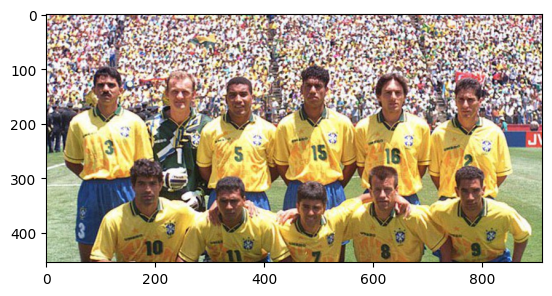

In [3]:
img = cv2.imread('Selecao.jpeg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [4]:
blue,green,red = cv2.split(img)

In [5]:
# Iniciando o PCA com os 20 primeiros componentes
pca = PCA(20)
 
# Aplicando ao canal vermelho, verde e azul e, em seguida, aplicando a transformação inversa ao array transformado.

red_transformed = pca.fit_transform(red)
red_inverted = pca.inverse_transform(red_transformed)
 
green_transformed = pca.fit_transform(green)
green_inverted = pca.inverse_transform(green_transformed)
 
blue_transformed = pca.fit_transform(blue)
blue_inverted = pca.inverse_transform(blue_transformed)

In [6]:
img_compressed = (np.dstack((red_inverted, green_inverted, blue_inverted))).astype(np.uint8)

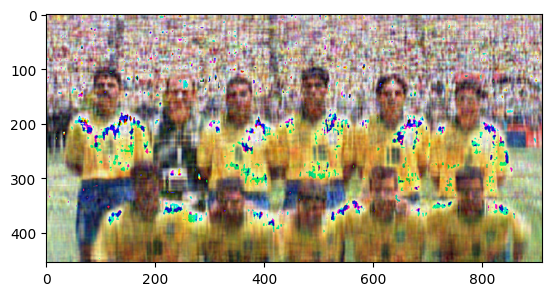

In [7]:
plt.imshow(img_compressed)